In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_India_Budget=pd.read_csv("Dataset/India_Budget_Dataset.csv")

In [ ]:
df_India_Budget

,Unnamed: 0,tconst,language,originalTitle,isAdult,startYear,runtimeMinutes,genres_x,averageRating,numVotes,directors,writers,Actors,Actress,Director,adult,belongs_to_collection,budget,overview,popularity,production_companies,release_date,revenue,spoken_languages,status,tagline
0,0,tt0004972,en,The Birth of a Nation,0,1915,195,"Drama,History,War",6.2,23962,nm0000428,"nm0228746,nm0000428,nm0940488",['Henry B. Walthall'],"['Miriam Cooper', 'Lillian Gish', 'Mae Marsh']",['D.W. Griffith'],False,NaN,100000,The Birth of A Nation is a silent film from 19...,5.113205,"[{'name': 'Epoch Film Co.', 'id': 351}]",1915-02-08,11000000.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,The fiery cross of the Ku Klux Klan.
1,1,tt0011960,en,Die Bergkatze,0,1921,79,"Comedy,Drama,Romance",6.9,1157,nm0523932,"nm0473134,nm0523932","['Hermann Thimig', 'Paul Heidemann', 'Victor J...","['Marga Köhler', 'Edith Meller', 'Pola Negri']",['Ernst Lubitsch'],False,NaN,0,A charismatic lieutenant newly assigned to a r...,0.732999,"[{'name': 'Projektions-AG Union (PAGU)', 'id':...",1921-04-14,0.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN
2,2,tt0013688,en,The Toll of the Sea,0,1922,54,"Drama,Family,Fantasy",6.6,727,nm0291387,nm0547966,['Kenneth Harlan'],"['Beatrice Bentley', 'Etta Lee', 'Priscilla Mo...",['Chester M. Franklin'],False,NaN,0,When young Lotus Flower sees an unconscious ma...,0.994973,"[{'name': 'Metro Pictures Corporation', 'id': ...",1922-11-26,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN
3,3,tt0014142,hi,The Hunchback of Notre Dame,0,1923,133,"Drama,Horror,Romance",7.2,5262,nm0941637,"nm0401076,nm0790622,nm0522871,nm0730929","['Norman Kerry', 'Lon Chaney']","['Kate Lester', 'Patsy Ruth Miller']",['Wallace Worsley'],False,NaN,0,Hunchback's story revolves around a beautiful ...,1.469045,"[{'name': 'Universal Pictures', 'id': 33}]",1923-09-06,0.0,[],Released,NaN
4,4,tt0015016,en,The Iron Horse,0,1924,150,"History,Romance,Western",7.2,2131,nm0000406,"nm0448981,nm0751246,nm0201544","[""George O'Brien"", 'Cyril Chadwick', 'Charles ...",['Madge Bellamy'],['John Ford'],False,NaN,0,"Springfield, Illinois. Brandon, a surveyor, dr...",0.990037,"[{'name': 'Fox Film Corporation', 'id': 5488}]",1924-08-24,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9794,9794,tt6399158,en,Jojakdoen dosi,0,2017,126,"Action,Crime,Thriller",6.9,4941,nm2019556,nm5371819,"['Ji Chang-Wook', 'Woo Hyeon', 'Jae-hong Ahn',...","['Shim Eun-kyung', 'Lee Hanee', 'Min-Jung Bae']",['Kwang-Hyun Park'],False,NaN,0,"In real life, Kwon Yoo is unemployed, but in t...",2.358168,"[{'name': 'TPS Company', 'id': 92805}]",2017-02-09,0.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN
9795,9795,tt6574146,en,Blame!,0,2017,106,"Action,Animation,Drama",6.7,7663,nm2670218,"nm0613444,nm4963204","['Mamoru Miyano', 'Takahiro Sakurai']","['Kana Hanazawa', 'Sora Amamiya']",['Hiroyuki Seshita'],False,NaN,0,"In the distant technological future, civilizat...",3.455833,"[{'name': 'Polygon Pictures', 'id': 20024}]",2017-05-20,0.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN
9796,9796,tt6690310,hi,Fei fan ren wu,0,2017,117,"Action,Crime",6.2,769,"nm0538320,nm1573851",nm0159039,"['Xuan Huang', 'Yihong Duan', 'Yanhui Wang']",['Yueting Lang'],"['Anthony Pun', 'Alan Mak']",False,NaN,0,‘Extraordinary Mission’ is a new Chinese actio...,2.552316,"[{'name': 'Pop Movies', 'id': 5690}, {'name': ...",2017-03-31,0.0,"[{'iso_639_1': 'cn', 'name': '广州话 / 廣州話'}, {'i...",Released,NaN
9797,9797,tt6712026,en,Kavan,0,2017,150,"Action,Drama,Thriller",7.1,2275,nm0433895,"nm0433895,nm9509969,nm9198373","['Vijay Sethupathi', 'Thesingu Rajendar', 'Bos...",['Madonna Sebastian'],['K.V. Anand'],False,NaN,0,"A budding journalist passionate about ethical,...",1.262638,"[{'name': 'AGS Entertainment', 'id': 5907}]",2017-03-31,0.0,"[{'iso_639_1': 'ta', 'name': 'தமிழ்'}]",Rel

In [ ]:
df_India_Budget.columns

Index(['Unnamed: 0', 'tconst', 'language', 'originalTitle', 'isAdult',
       'startYear', 'runtimeMinutes', 'genres_x', 'averageRating', 'numVotes',
       'directors', 'writers', 'Actors', 'Actress', 'Director', 'adult',
       'belongs_to_collection', 'budget', 'overview', 'popularity',
       'production_companies', 'release_date', 'revenue', 'spoken_languages',
       'status', 'tagline'],
      dtype='object')

In [ ]:
df_India_Budget=df_India_Budget[['language','originalTitle','isAdult','startYear', 'runtimeMinutes','Actors', 'Actress', 'Director', 'genres_x', 'averageRating', 'numVotes','budget', 'popularity','production_companies', 'revenue' ]]

In [ ]:
df_India_Budget=df_India_Budget[(df_India_Budget['budget']!=0) & (df_India_Budget['revenue']!=0.0)]

In [ ]:
df_India_Budget.reset_index(drop=True,inplace=True)

In [ ]:
df_India_Budget.shape

(5031, 15)

In [ ]:
df_India_Budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5031 entries, 0 to 5030
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   language              5031 non-null   object 
 1   originalTitle         5031 non-null   object 
 2   isAdult               5031 non-null   int64  
 3   startYear             5031 non-null   int64  
 4   runtimeMinutes        5031 non-null   int64  
 5   Actors                5031 non-null   object 
 6   Actress               5031 non-null   object 
 7   Director              5031 non-null   object 
 8   genres_x              5031 non-null   object 
 9   averageRating         5031 non-null   float64
 10  numVotes              5031 non-null   int64  
 11  budget                5031 non-null   int64  
 12  popularity            5031 non-null   float64
 13  production_companies  5031 non-null   object 
 14  revenue               5031 non-null   float64
dtypes: float64(3), int64(

In [ ]:
df_India_Budget['production_companies']=df_India_Budget.production_companies.str.replace('[','')
df_India_Budget['production_companies']=df_India_Budget.production_companies.str.replace(']','')

In [ ]:
df_India_Budget=df_India_Budget[(df_India_Budget['production_companies']!="")]

In [ ]:
final_list = df_India_Budget['production_companies'].tolist()

In [ ]:
df_India_Budget.shape

(4971, 15)

In [ ]:
final=[]
for i in range(len(final_list)):
     Dict = eval(final_list[i])
     if isinstance(Dict,dict):
        final.append(Dict['name'])
     else:
          X=''
          for tup in Dict:
              X=X+tup['name']+','
          final.append(X)    

In [ ]:
for i in range(len(final)):
    if(final[i][-1]==','):
        temp=final[i][:-1]
        final[i]=temp

In [ ]:
df_India_Budget['production_companies']=final

In [ ]:
df_India_Budget['Actress']=df_India_Budget['Actress'].str.split("[").str.get(1)
df_India_Budget['Actress']=df_India_Budget['Actress'].str.split("]").str.get(0)
df_India_Budget['Actress']=df_India_Budget['Actress'].str.replace('"','')
df_India_Budget['Actress']=df_India_Budget['Actress'].str.replace("'",'')

In [ ]:
df_India_Budget['Actors']=df_India_Budget['Actors'].str.split("[").str.get(1)
df_India_Budget['Actors']=df_India_Budget['Actors'].str.split("]").str.get(0)
df_India_Budget['Actors']=df_India_Budget['Actors'].str.replace('"','')
df_India_Budget['Actors']=df_India_Budget['Actors'].str.replace("'",'')

In [ ]:
df_India_Budget['Director']=df_India_Budget['Director'].str.split("[").str.get(1)
df_India_Budget['Director']=df_India_Budget['Director'].str.split("]").str.get(0)
df_India_Budget['Director']=df_India_Budget['Director'].str.replace('"','')
df_India_Budget['Director']=df_India_Budget['Director'].str.replace("'",'')

In [ ]:
df_India_Budget.columns=['language', 'Moviename', 'isAdult', 'releaseYear', 'runtimeMinutes',
       'Actors', 'Actress', 'Director', 'genres', 'averageRating',
       'numVotes', 'budget', 'popularity', 'production_companies', 'revenue']

In [ ]:
#Converting dollar to million dollar
df_India_Budget['budget']=df_India_Budget['budget']/1000000
df_India_Budget['revenue']=df_India_Budget['revenue']/1000000

In [ ]:
df_India_Budget['Profit']=df_India_Budget['revenue']-df_India_Budget['budget']

In [ ]:
df_India_Budget.language=df_India_Budget.language.replace({'hi':'Hindi','en': 'English','ml':'Malayalam','ta':'Tamil','te':'Telgu',
                          'ur':'Urdu','bn':'Bengali','kn':'Kannada','mr':'Marathi','gu':'Gujarati','pa':'Punjabi'})

top 5 movies with highest budget

In [ ]:
df_India_Budget.groupby('Moviename')[['budget']].mean().sort_values(by='budget',ascending=False).head(5)

,budget
Moviename,
Pirates of the Caribbean: On Stranger Tides,380.0
Pirates of the Caribbean: At World's End,300.0
Superman Returns,270.0
Tangled,260.0
Transformers: The Last Knight,260.0


**Pirates of the Caribbean: On Stranger Tides** has the highest budget of **380** million dollar

top5 movies with highest revenue

In [ ]:
df_India_Budget.groupby('Moviename')[['revenue']].mean().sort_values(by='revenue',ascending=False).head(5)

,revenue
Moviename,
Avatar,2787.965087
Star Wars: Episode VII - The Force Awakens,2068.223624
Jurassic World,1513.528810
Titanic,1477.008350
Harry Potter and the Deathly Hallows: Part 2,1342.000000


**Avatar** has the highest revenue of **2787.965087** million dollar

top 5 movies with highest profit

In [ ]:
df_India_Budget.groupby('Moviename')[['Profit']].mean().sort_values(by='Profit',ascending=False).head(5)

,Profit
Moviename,
Avatar,2550.965087
Star Wars: Episode VII - The Force Awakens,1823.223624
Jurassic World,1363.528810
Titanic,1316.647350
Harry Potter and the Deathly Hallows: Part 2,1217.000000


**Avatar** has the highest profit of **2550.965087** million dollar

Bottom 5 movies with lowest budget

In [ ]:
df_India_Budget.groupby('Moviename')[['budget']].mean().sort_values(by='budget',ascending=False).tail(5)

,budget
Moviename,
Starter for 10,0.000008
Raja Natwarlal,0.000005
The Letters,0.000001
Tere Naam,0.000001
East of Eden,0.000001


**East of Eden** has the lowest budget of **0.000001** million dollar

Bottom 5 movies with lowest revenue

In [ ]:
df_India_Budget.groupby('Moviename')[['revenue']].mean().sort_values(by='revenue',ascending=False).tail(5)

,revenue
Moviename,
Bodyguard,0.000008
East of Eden,0.000005
Raja Natwarlal,0.000004
Tere Naam,0.000002
The Letters,0.000001


**The Letters** has the lowest revenue of **0.000001** million dollar

Bottom 5 movies with lowest profit

In [ ]:
df_India_Budget.groupby('Moviename')[['Profit']].mean().sort_values(by='Profit',ascending=False).tail(5)

,Profit
Moviename,
Australia,-80.445998
Flushed Away,-84.540684
Metropolis,-91.969578
The 13th Warrior,-98.301101
Valerian and the City of a Thousand Planets,-107.447384


**Valerian and the City of a Thousand Planets** has the lowest profit of **-107.447384** million dollar

Scatter plot of runtime vs profit

In [ ]:
runtime = df_India_Budget['runtimeMinutes'].tolist()
profit = df_India_Budget['Profit'].tolist()

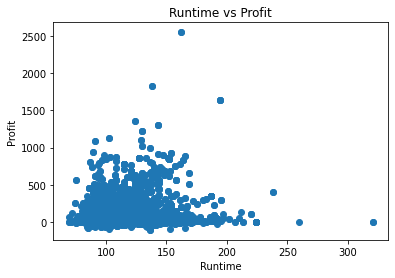

In [ ]:
plt.scatter(runtime,profit)
plt.title('Runtime vs Profit')
plt.xlabel('Runtime')
plt.ylabel('Profit')
plt.show()

As runtime is increasing there is increase in profit for some movies.

 scatter plot of rating vs profit

In [ ]:
rating = df_India_Budget['averageRating'].tolist()
profit = df_India_Budget['Profit'].tolist()

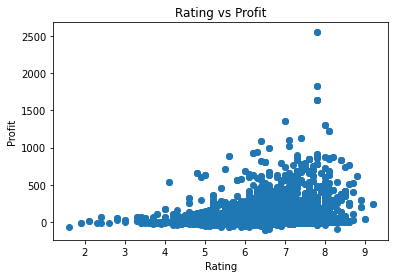

In [ ]:
plt.scatter(rating,profit)
plt.title('Rating vs Profit')
plt.xlabel('Rating')
plt.ylabel('Profit')
plt.show()

From above scatter we cn interpret that as rating is increasing profit is also increasing.

Top production house with most number of movies

In [ ]:
l=[]
for x in df_India_Budget['production_companies']:
   l.append(x.split(','))

In [ ]:
prodlist=[]
for x in l:
   for y in x:
            prodlist.append(y)           

In [ ]:
uniquephouse=[]
for x in prodlist:
  if x not in uniquephouse:
     uniquephouse.append(x)
print("The number of production house is %d" %len(uniquephouse))    

The number of production house is 3358


In [ ]:
from collections import Counter
c=Counter(prodlist)

In [ ]:
c=c.most_common(6)
moviecount={}
for x in c:
    key=x[0]
    moviecount[key]=x[1]
moviecount


{'Columbia Pictures': 275,
 'Paramount Pictures': 371,
 'Relativity Media': 167,
 'Twentieth Century Fox Film Corporation': 313,
 'Universal Pictures': 468,
 'Warner Bros.': 482}

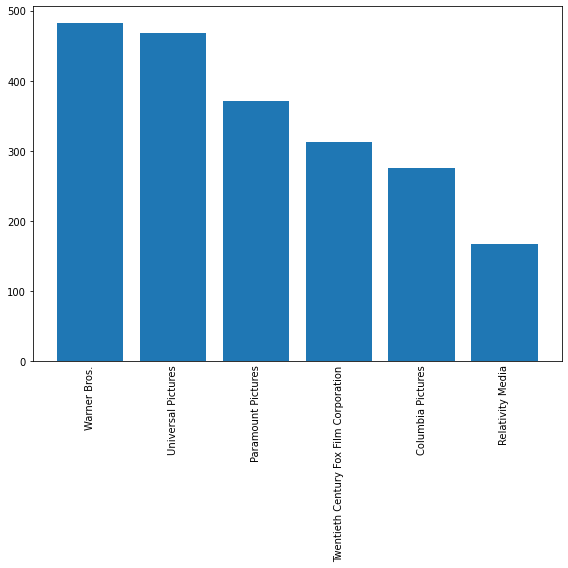

In [ ]:
fig,x=plt.subplots(figsize=(8,8))
plt.bar(*zip(*moviecount.items()))
plt.setp(x.get_xticklabels(), rotation=90)
x.tick_params(labelsize=10)
x.tick_params(length=0, axis='x')
plt.tight_layout()
plt.show()

Average profit for each production house and plotting top 6

In [ ]:
avgprofit=[]
for x in uniquephouse:
      avgprofit.append(df_India_Budget[df_India_Budget['production_companies'].str.contains(x)].Profit.mean())

In [ ]:
Averageprofit = pd.DataFrame(zip(uniquephouse,avgprofit), columns =['Production house','averageProfit'])
Averageprofit.sort_values('averageProfit',ascending=False,inplace=True)
Averageprofit=Averageprofit.head(6)

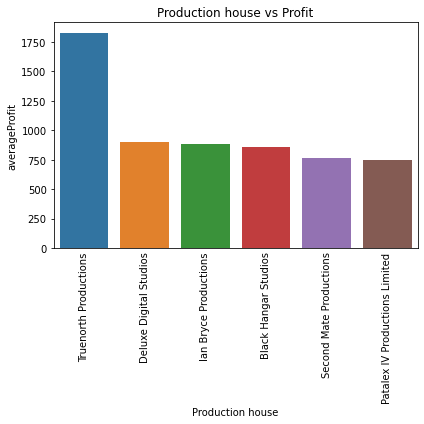

In [ ]:
fig,x=plt.subplots(figsize=(6,6))
sns.barplot(x = 'Production house',
            y = 'averageProfit',
            data =Averageprofit)
plt.title('Production house vs Profit')
plt.setp(x.get_xticklabels(), rotation=90)
x.tick_params(labelsize=10)
x.tick_params(length=0, axis='x')
plt.tight_layout()
plt.show()


Movies produced by **Truenorth Production** has the highest average profit

Average revenue for each production house and plotting top 6

In [ ]:
avgrevenue=[]
for x in uniquephouse:
      avgrevenue.append(df_India_Budget[df_India_Budget['production_companies'].str.contains(x)].revenue.mean())

In [ ]:
Averagerevenue = pd.DataFrame(zip(uniquephouse,avgrevenue), columns =['Production house','averagerevenue'])
Averagerevenue.sort_values('averagerevenue',ascending=False,inplace=True)
Averagerevenue=Averagerevenue.head(6)

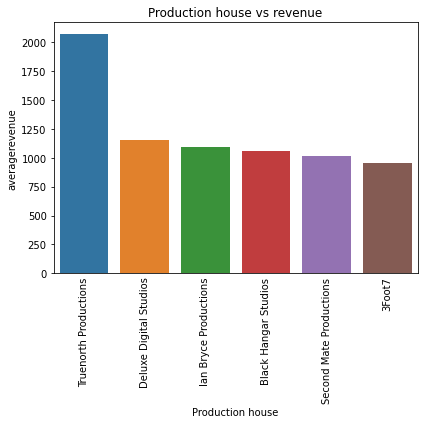

In [ ]:
fig,x=plt.subplots(figsize=(6,6))
sns.barplot(x = 'Production house',
            y = 'averagerevenue',
            data =Averagerevenue)
plt.title('Production house vs revenue')
plt.setp(x.get_xticklabels(), rotation=90)
x.tick_params(labelsize=10)
x.tick_params(length=0, axis='x')
plt.tight_layout()
plt.show()

Movies produced by **Truenorth Production** has the highest average revenue

Average budget for each production house and plotting top 6

In [ ]:
avgbudget=[]
for x in uniquephouse:
      avgbudget.append(df_India_Budget[df_India_Budget['production_companies'].str.contains(x)].budget.mean())

In [ ]:
Averagebudget = pd.DataFrame(zip(uniquephouse,avgbudget), columns =['Production house','averagebudget'])
Averagebudget.sort_values('averagebudget',ascending=False,inplace=True)
Averagebudget=Averagebudget.head(6)

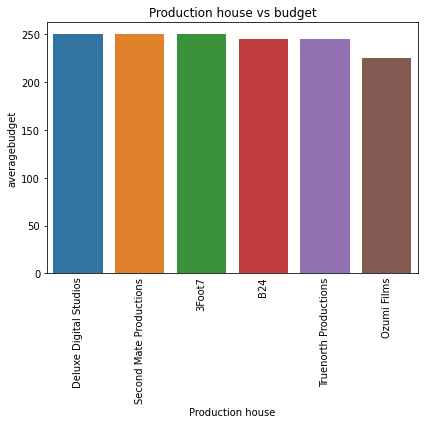

In [ ]:
fig,x=plt.subplots(figsize=(6,6))
sns.barplot(x = 'Production house',
            y = 'averagebudget',
            data =Averagebudget)
plt.title('Production house vs budget')
plt.setp(x.get_xticklabels(), rotation=90)
x.tick_params(labelsize=10)
x.tick_params(length=0, axis='x')
plt.tight_layout()
plt.show()

Movies produced by **Deluxe Digital Studios** has the highest average budget

Top6 genres with most profit films

In [ ]:
l=[]
for x in df_India_Budget['genres']:
   l.append(x.split(','))

In [ ]:
genrelist=[]
for x in l:
   for y in x:
            genrelist.append(y)           

In [ ]:
uniquegenre=[]
for x in genrelist:
  if x not in uniquegenre:
     uniquegenre.append(x)  

In [ ]:
avgprofit=[]
for x in uniquegenre:
      avgprofit.append(df_India_Budget[df_India_Budget['genres'].str.contains(x)].Profit.mean())

In [ ]:
Averageprofit = pd.DataFrame(zip(uniquegenre,avgprofit), columns =['Genre','averageProfit'])
Averageprofit.sort_values('averageProfit',ascending=False,inplace=True)
Averageprofit=Averageprofit.head(6)

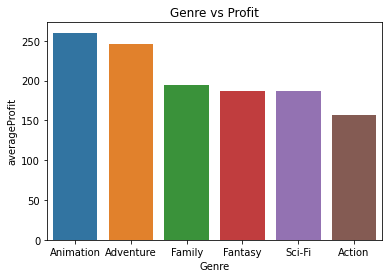

In [ ]:
sns.barplot(x = 'Genre',
            y = 'averageProfit',
            data =Averageprofit)
plt.title('Genre vs Profit')
plt.show()

Movies of **Animation** genre has most average profit

Top6 genres with most budget films

In [ ]:
avgbudget=[]
for x in uniquegenre:
      avgbudget.append(df_India_Budget[df_India_Budget['genres'].str.contains(x)].budget.mean())

In [ ]:
Averagebudget = pd.DataFrame(zip(uniquegenre,avgbudget), columns =['Genre','averagebudget'])
Averagebudget.sort_values('averagebudget',ascending=False,inplace=True)
Averagebudget=Averagebudget.head(6)

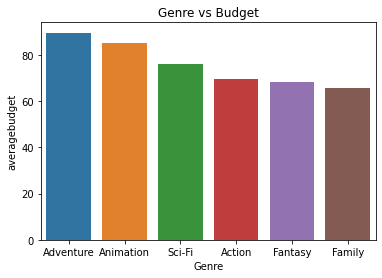

In [ ]:
sns.barplot(x = 'Genre',
            y = 'averagebudget',
            data =Averagebudget)
plt.title('Genre vs Budget')
plt.show()

Movies of **Adventure** genre has most average budget

Top6 genres with most revenue films

In [ ]:
avgrevenue=[]
for x in uniquegenre:
      avgrevenue.append(df_India_Budget[df_India_Budget['genres'].str.contains(x)].revenue.mean())

In [ ]:
Averagerevenue = pd.DataFrame(zip(uniquegenre,avgrevenue), columns =['Genre','averagerevenue'])
Averagerevenue.sort_values('averagerevenue',ascending=False,inplace=True)
Averagerevenue=Averagerevenue.head(6)

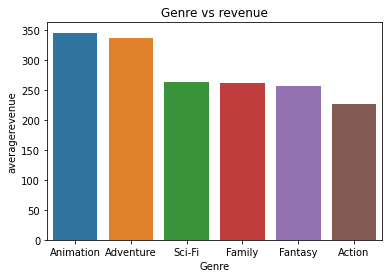

In [ ]:
sns.barplot(x = 'Genre',
            y = 'averagerevenue',
            data =Averagerevenue)
plt.title('Genre vs revenue')
plt.show()

Movies of **Animation** genre has most average revenue

Language wise profit,budget,revenue

In [ ]:
df_India_Budget.language.value_counts()

English      2500
Hindi        2081
Tamil          94
Malayalam      69
Telgu          66
Bengali        44
Marathi        32
Gujarati       30
Kannada        30
Urdu           25
Name: language, dtype: int64

In [ ]:
df_lang=df_India_Budget.groupby("language")
df_lang =df_lang.mean().reset_index()
df_lang=df_lang[['language','Profit']].sort_values('Profit',ascending=False)

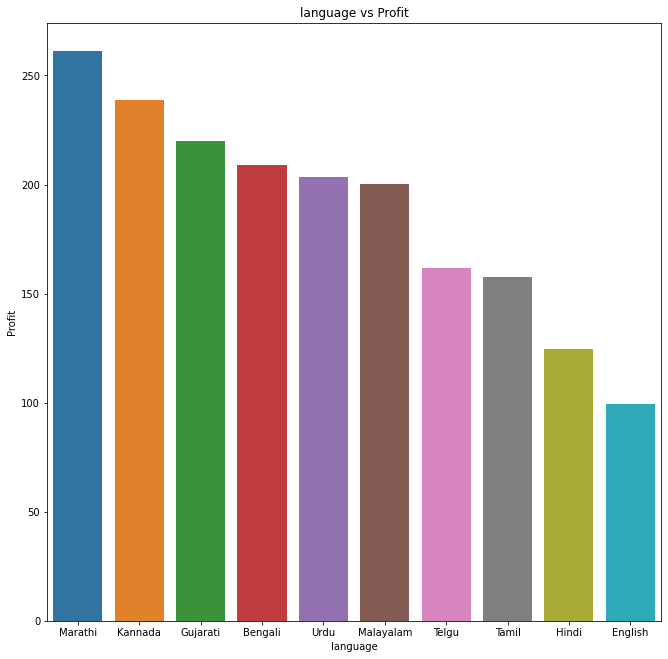

In [ ]:
plt.figure(figsize=(11,11))
sns.barplot(x = 'language',
            y = 'Profit',
            data = df_lang)
plt.title('language vs Profit')
plt.show()

In [ ]:
df_lang=df_India_Budget.groupby("language")
df_lang =df_lang.mean().reset_index()
df_lang=df_lang[['language','budget']].sort_values('budget',ascending=False)

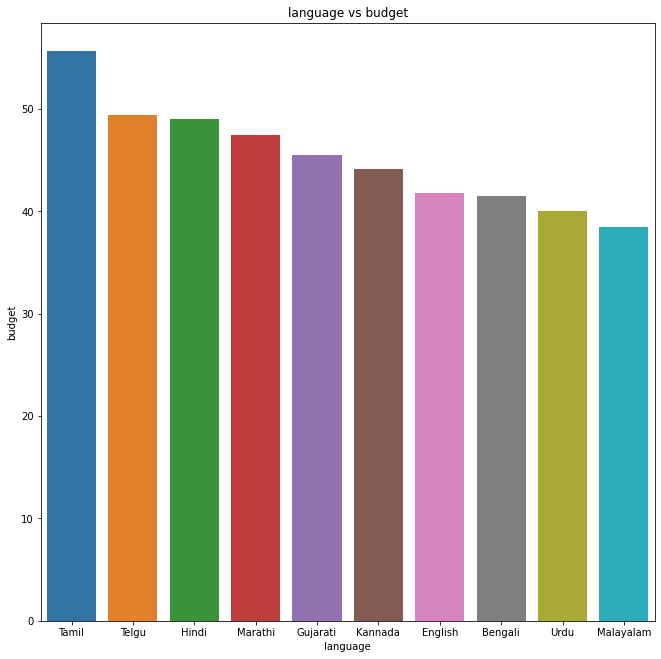

In [ ]:
plt.figure(figsize=(11,11))
sns.barplot(x = 'language',
            y = 'budget',
            data = df_lang)
plt.title('language vs budget')
plt.show()

In [ ]:
df_lang=df_India_Budget.groupby("language")
df_lang =df_lang.mean().reset_index()
df_lang=df_lang[['language','revenue']].sort_values('revenue',ascending=False)

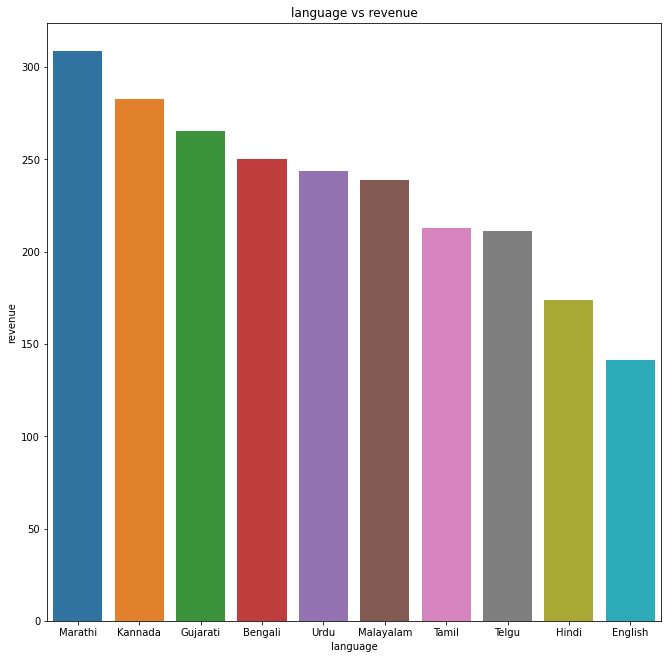

In [ ]:
plt.figure(figsize=(11,11))
sns.barplot(x = 'language',
            y = 'revenue',
            data = df_lang)
plt.title('language vs revenue')
plt.show()

Profit over the years

In [ ]:
df_year=df_India_Budget.copy()
df_year=df_year[df_year['releaseYear']>=1980]
df_year=(df_year.groupby(df_year['releaseYear'],as_index=False).aggregate(np.mean).reindex(columns=df_year.columns))
df_year.sort_values('Profit',ascending=False,inplace=True)
df_year=df_year[['releaseYear','Profit']].reset_index(drop=True)

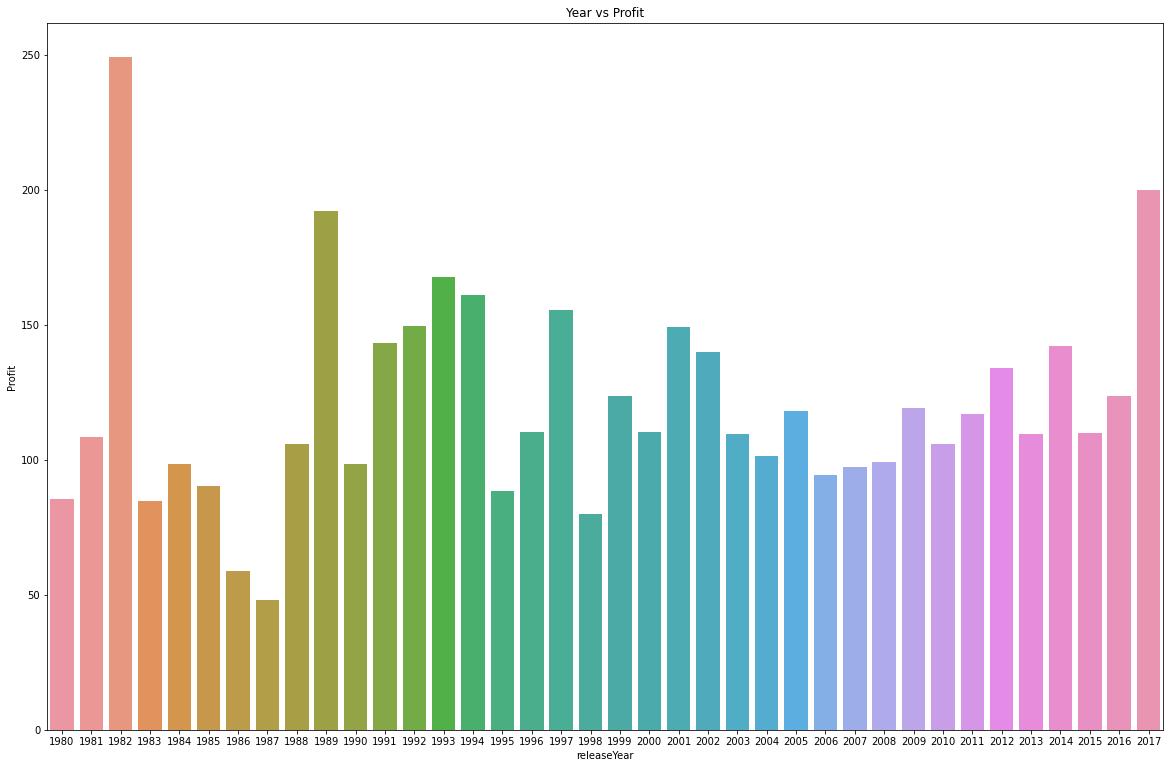

In [ ]:
plt.figure(figsize=(20,13))
sns.barplot(x = 'releaseYear',
            y = 'Profit',
            data = df_year)
plt.title('Year vs Profit')
plt.show()

Year **1982** has the highest average profit

Year **1987** has the lowest average profit

The average profit has no fixed trends.

Budget over the years

In [ ]:
df_year=df_India_Budget.copy()
df_year=df_year[df_year['releaseYear']>=1980]
df_year=(df_year.groupby(df_year['releaseYear'],as_index=False).aggregate(np.mean).reindex(columns=df_year.columns))
df_year.sort_values('budget',ascending=False,inplace=True)
df_year=df_year[['releaseYear','budget']].reset_index(drop=True)

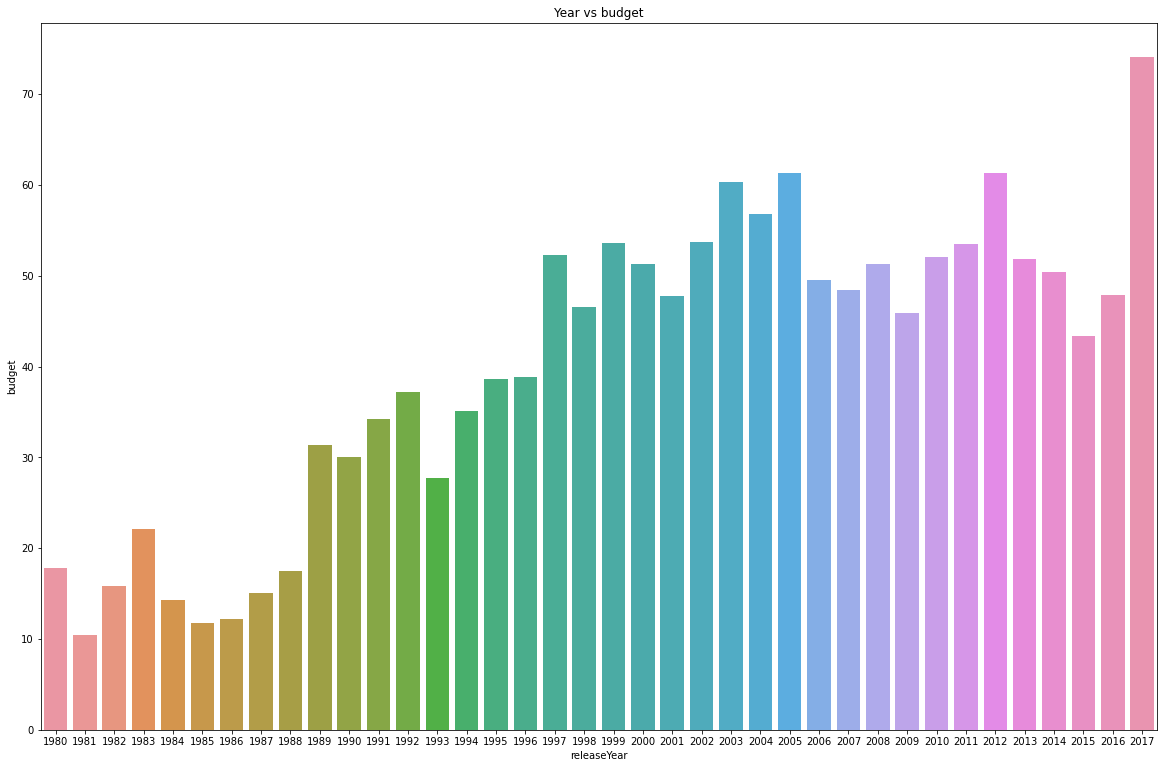

In [ ]:
plt.figure(figsize=(20,13))
sns.barplot(x = 'releaseYear',
            y = 'budget',
            data = df_year)
plt.title('Year vs budget')
plt.show()

Year **2017** has the highest average budget

Year **1981** has the lowest average budget

The average budget is generally increasing over the years but there is decreasing budget for some years.

Revenue over the years

In [ ]:
df_year=df_India_Budget.copy()
df_year=df_year[df_year['releaseYear']>=1980]
df_year=(df_year.groupby(df_year['releaseYear'],as_index=False).aggregate(np.mean).reindex(columns=df_year.columns))
df_year.sort_values('revenue',ascending=False,inplace=True)
df_year=df_year[['releaseYear','revenue']].reset_index(drop=True)

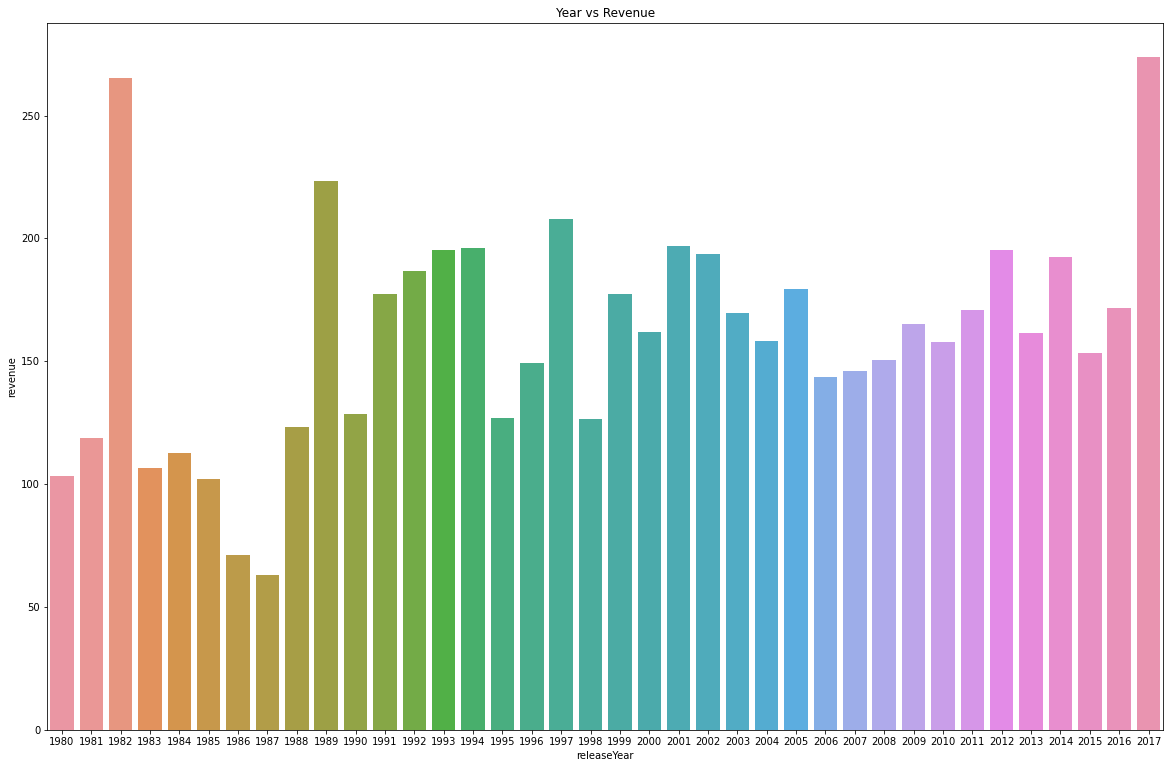

In [ ]:
plt.figure(figsize=(20,13))
sns.barplot(x = 'releaseYear',
            y = 'revenue',
            data = df_year)
plt.title('Year vs Revenue')
plt.show()

Year **2017** has the highest average revenue

Year **1987** has the lowest average revenue

The average revenue is generally increasing over the years but there is decreasing budget for some years.